In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,classification_report
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Reading in the csv file using pandas

In [2]:
data = pd.read_csv("bundas_train.csv")

In [3]:
data

,Item_ID,Weight,FatContent,Visibility,Category,Max_Price,Store_ID,Store_Establishment_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Get a feel of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_ID                     8523 non-null object
Weight                      7060 non-null float64
FatContent                  8523 non-null object
Visibility                  8523 non-null float64
Category                    8523 non-null object
Max_Price                   8523 non-null float64
Store_ID                    8523 non-null object
Store_Establishment_Year    8523 non-null int64
Store_Size                  6113 non-null object
Store_Location_Type         8523 non-null object
Store_Type                  8523 non-null object
Item_Store_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.describe()

,Weight,Visibility,Max_Price,Store_Establishment_Year,Item_Store_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data.columns

Index(['Item_ID', 'Weight', 'FatContent', 'Visibility', 'Category',
       'Max_Price', 'Store_ID', 'Store_Establishment_Year', 'Store_Size',
       'Store_Location_Type', 'Store_Type', 'Item_Store_Sales'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(font_scale = 2)

from sklearn.model_selection import train_test_split

In [8]:
data.isnull().sum()


Item_ID                        0
Weight                      1463
FatContent                     0
Visibility                     0
Category                       0
Max_Price                      0
Store_ID                       0
Store_Establishment_Year       0
Store_Size                  2410
Store_Location_Type            0
Store_Type                     0
Item_Store_Sales               0
dtype: int64

# Checking for correaltion to determine how our independent variables affect the dependant, target variable(strenghth of relationship and direction) #Measure the degree of the relationship between linearly related variables

In [9]:
pearson_corr = data.corr()
pearson_corr

,Weight,Visibility,Max_Price,Store_Establishment_Year,Item_Store_Sales
Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Max_Price,0.027141,-0.001315,1.000000,0.005020,0.567574
Store_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Store_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [10]:
#measures the strength of dependence between two variables.
kendall = data.corr(method = 'kendall')
kendall

,Weight,Visibility,Max_Price,Store_Establishment_Year,Item_Store_Sales
Weight,1.000000,-0.009776,0.020303,-0.006688,0.009876
Visibility,-0.009776,1.000000,0.003829,-0.038779,-0.077026
Max_Price,0.020303,0.003829,1.000000,0.002659,0.406991
Store_Establishment_Year,-0.006688,-0.038779,0.002659,1.000000,0.030798
Item_Store_Sales,0.009876,-0.077026,0.406991,0.030798,1.000000


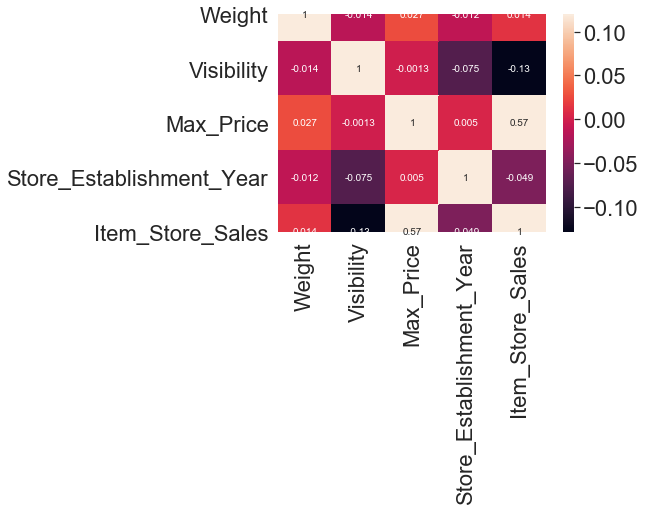

In [11]:
#Correlation matrix
sns.heatmap(pearson_corr,vmax =.12, annot = True )

In [12]:
# #Correlation matrix
# f = plt.figure(figsize=(9, 10))
# plt.matshow(data.corr(), fignum=f.number)
# plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
# plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

# FEATURE ENGINEERING

# We drop the columns that are not important to our model i.e. Store_ID and Item_ID

In [13]:
data = data.drop(['Store_ID' , 'Item_ID'] ,axis =1)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Weight                      7060 non-null float64
FatContent                  8523 non-null object
Visibility                  8523 non-null float64
Category                    8523 non-null object
Max_Price                   8523 non-null float64
Store_Establishment_Year    8523 non-null int64
Store_Size                  6113 non-null object
Store_Location_Type         8523 non-null object
Store_Type                  8523 non-null object
Item_Store_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [15]:
# columns left
for col in data.columns: 
    print(col) 

Weight
FatContent
Visibility
Category
Max_Price
Store_Establishment_Year
Store_Size
Store_Location_Type
Store_Type
Item_Store_Sales


#### Dealing with missing values

In [16]:
def missing_values_table(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(data)

Your selected dataframe has 10 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Store_Size,2410,28.3
Weight,1463,17.2


In [17]:
# #count of each number of year in the job 
# plt.figure(figsize=(20,8))
# sns.countplot(data['Store_Size'])

# We drop the rows that have null values in their Store_Size column as it is difficult to impute categorical values especially after encoding as it makes the data skewed. 

In [18]:
# drop rows with missing store_size values
data = data.dropna(subset=['Store_Size'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 10 columns):
Weight                      4650 non-null float64
FatContent                  6113 non-null object
Visibility                  6113 non-null float64
Category                    6113 non-null object
Max_Price                   6113 non-null float64
Store_Establishment_Year    6113 non-null int64
Store_Size                  6113 non-null object
Store_Location_Type         6113 non-null object
Store_Type                  6113 non-null object
Item_Store_Sales            6113 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 525.3+ KB


# To deal with the Weight column, we impute the null values with the median using fillna().
# Mean is not advisable as it considers outliers and makes the data a bit skewed. 

In [20]:
#imputing missing values with median
Weight = data['Weight']
median = Weight.median()
print(median)
Weight.fillna(median,inplace = True)

12.65


# We now check our data to see if it has been cleaned enough to be processed by a model i.e. no missing values.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 10 columns):
Weight                      6113 non-null float64
FatContent                  6113 non-null object
Visibility                  6113 non-null float64
Category                    6113 non-null object
Max_Price                   6113 non-null float64
Store_Establishment_Year    6113 non-null int64
Store_Size                  6113 non-null object
Store_Location_Type         6113 non-null object
Store_Type                  6113 non-null object
Item_Store_Sales            6113 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 525.3+ KB


#### Dealing with redundant values

In [22]:
# dealing with repeated value names
data['FatContent'] = data['FatContent'].replace({'Low Fat': 'Low_Fat', 'Regular': 'Regular', 'low fat': 'Low_Fat', 'LF': 'Low_Fat', 'reg':'Regular'})

In [23]:
data

,Weight,FatContent,Visibility,Category,Max_Price,Store_Establishment_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Sales
0,9.300,Low_Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low_Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,8.930,Low_Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...
8517,20.750,Regular,0.083607,Frozen Foods,178.8318,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,6.865,Low_Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,10.600,Low_Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# DATA VISUALIZATION

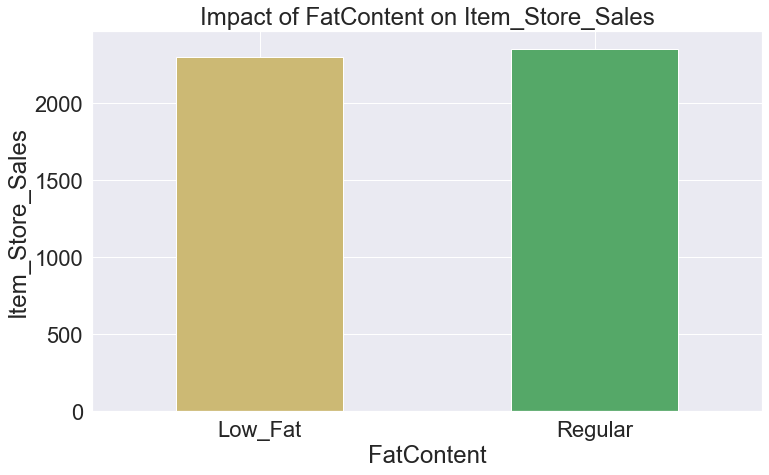

In [24]:
FatContent_pivot =data.pivot_table(index='FatContent', values="Item_Store_Sales", aggfunc=np.mean)
FatContent_pivot.plot(kind='bar', color=('y','g','r',),figsize=(12,7))
plt.xlabel("FatContent")
plt.ylabel("Item_Store_Sales")
plt.legend().set_visible(False)
plt.title("Impact of FatContent on Item_Store_Sales")
#plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.6), shadow=True, ncol=1)
plt.xticks(rotation=0)
plt.show()

In [25]:
FatContent_pivot

,Item_Store_Sales
FatContent,
Low_Fat,2305.015424
Regular,2355.078065


# In terms of Fat Content, products with regular fat are bought more often 

# The continuous values of the Weights have been binned to allow for better processing by the model.

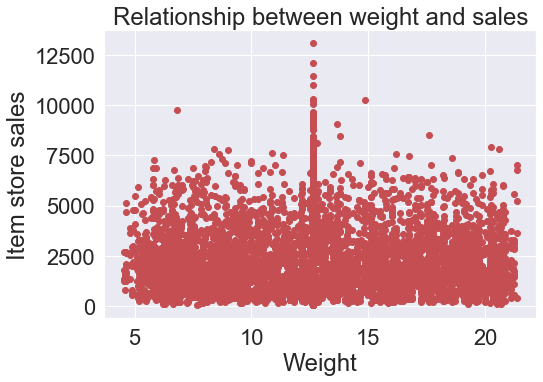

In [26]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(data.Weight,data.Item_Store_Sales , color='r')
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Weight')
ax.set_ylabel('Item store sales')
ax.set_title('Relationship between weight and sales')
plt.show()

In [27]:
# #weight
# data['binned_weight']= pd.cut(data['Weight'], bins = [0,5,10,15,20,25],labels= ['lower', 'low','middle', 'high','higher'])
# sns.set_style('darkgrid')
# binned_weight_pivot = data.pivot_table(index='binned_weight', values = 'Item_Store_Sales', aggfunc=np.mean)
# binned_weight_pivot.plot(kind='bar', color=('g','b','r','y'),figsize=(12,7))
# plt.title("impact of weight on item store sales")
# plt.xticks(rotation = 50)
# plt.ylabel('mean item store sales')
# plt.legend().set_visible(False)

In [28]:
# Products within the Middle weights bin(10 - 15) contribute more to sales

In [29]:
# The continuous values of the Maximum prices have been binned to allow for those values to be input into a model and it helps spots outliers.

In [30]:
# data.Max_Price.max()

In [31]:
# data.Max_Price.min()

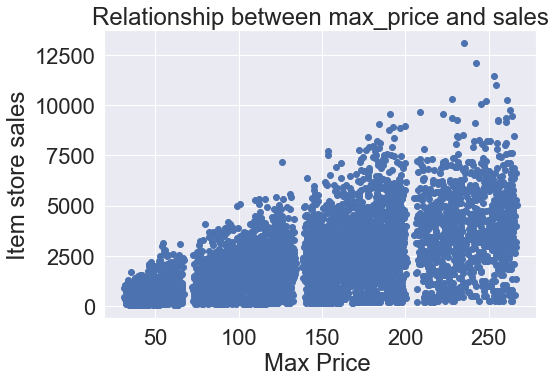

In [32]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(data.Max_Price,data.Item_Store_Sales , color='b')
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Max Price ')
ax.set_ylabel('Item store sales')
ax.set_title('Relationship between max_price and sales')
plt.show()

In [33]:
# #price
# data['binned_max_price']= pd.cut(data['Max_Price'], bins = [0,30,60,90,120,150,180,210,240,270],labels= ['ext_low_price','lowest_price','lower_price', 'low_price','middle_price', 'high_price','higher_price','highest_price','ext_high_price'])
# sns.set_style('darkgrid')
# binned_max_price_pivot = data.pivot_table(index='binned_max_price', values = 'Item_Store_Sales', aggfunc=np.mean)
# binned_max_price_pivot.plot(kind='bar', color=('m','r','b','k'),figsize=(12,7))
# plt.title("impact of levels of max_price on item store sales")
# plt.xticks(rotation = 50)
# plt.ylabel('mean item store sales')
# plt.legend().set_visible(False)


In [34]:
# binned_max_price_pivot

In [35]:
# Products with extremely high prices (240 - 270) contribute most to sales

In [36]:
# The continuous values of the Visibility have been binned to allow for better processing by the model

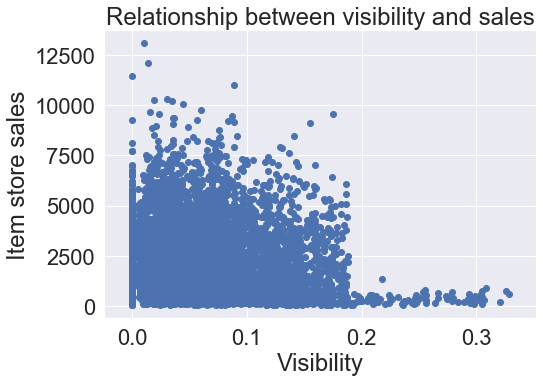

In [37]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(data.Visibility,data.Item_Store_Sales , color='b')
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Visibility')
ax.set_ylabel('Item store sales')
ax.set_title('Relationship between visibility and sales')
plt.show()

In [38]:
# data.Visibility.max()

In [39]:
# data.Visibility.min()

In [40]:
# #visibility
# data['binned_visibility']= pd.cut(data['Visibility'], bins = [-0.1,0.0,0.10,0.20,0.33],labels= ['not_all','not_visible','visible','very_visible'])
# sns.set_style('darkgrid')
# binned_visibility_pivot = data.pivot_table(index='binned_visibility', values = 'Item_Store_Sales', aggfunc=np.mean)
# binned_visibility_pivot.plot(kind='bar', color=('m','g','y','c'),figsize=(12,7))
# plt.title("impact of levels of visibility on item store sales")
# plt.xticks(rotation = 50)
# plt.ylabel('mean item store sales')
# plt.legend().set_visible(False)


In [41]:
# Visibility has a negative correlation with Sales thus the less the visibility, the more the sales and thus products within the not_visible bin (0.0,0.10) contribute most to sales

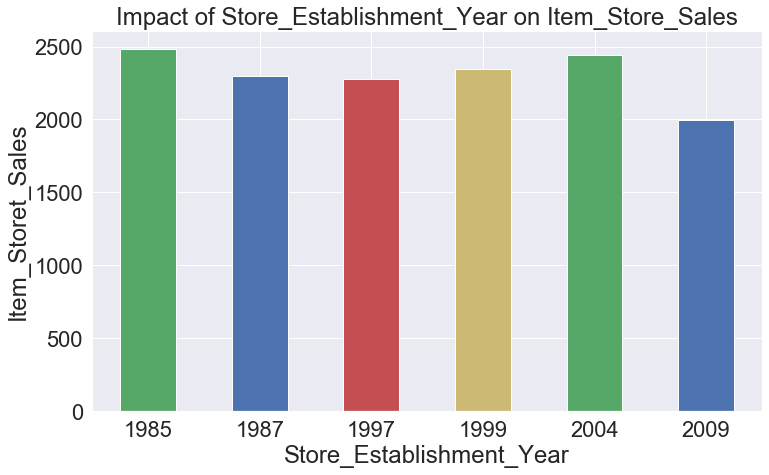

In [42]:
#year
colors = ('g','b','r','y')
Store_Establishment_Year_pivot = data.pivot_table(index='Store_Establishment_Year', values="Item_Store_Sales", aggfunc=np.mean)

Store_Establishment_Year_pivot.plot(kind='bar', color=colors,figsize=(12,7))
plt.xlabel("Store_Establishment_Year")
plt.ylabel("Item_Storet_Sales")
plt.title("Impact of Store_Establishment_Year on Item_Store_Sales")
plt.xticks(rotation=0)
plt.legend().set_visible(False)
plt.show()

In [43]:
Store_Establishment_Year_pivot

,Item_Store_Sales
Store_Establishment_Year,
1985,2483.677474
1987,2298.995256
1997,2277.844267
1999,2348.354635
2004,2438.841866
2009,1995.498739


In [44]:
# Store_Establishment_Year has a negative correlation with Item_Store_Sales thus the older the store, the more it contributes to sales. 1985 store has more sales.

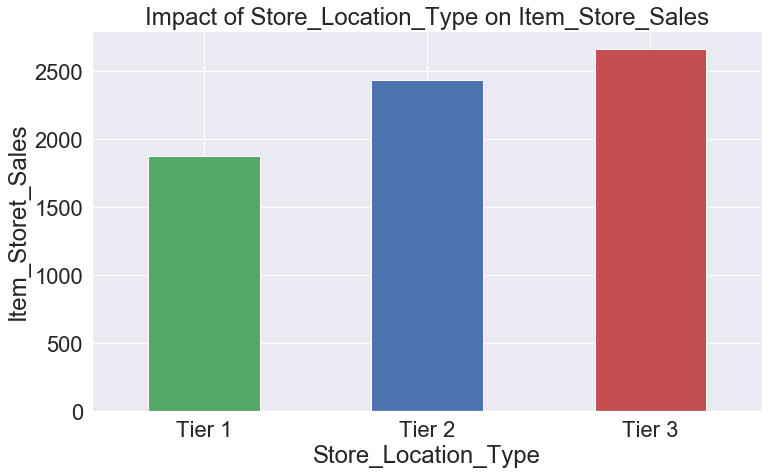

In [45]:
#store location
Store_Location_Type_pivot = data.pivot_table(index='Store_Location_Type', values="Item_Store_Sales", aggfunc=np.mean)

Store_Location_Type_pivot.plot(kind='bar', color=('g','b','r'),figsize=(12,7))
plt.xlabel("Store_Location_Type")
plt.ylabel("Item_Storet_Sales")
plt.title("Impact of Store_Location_Type on Item_Store_Sales")
plt.xticks(rotation=0)
plt.legend().set_visible(False)
plt.show()

# Tier 3 Store Type contributes most to sales

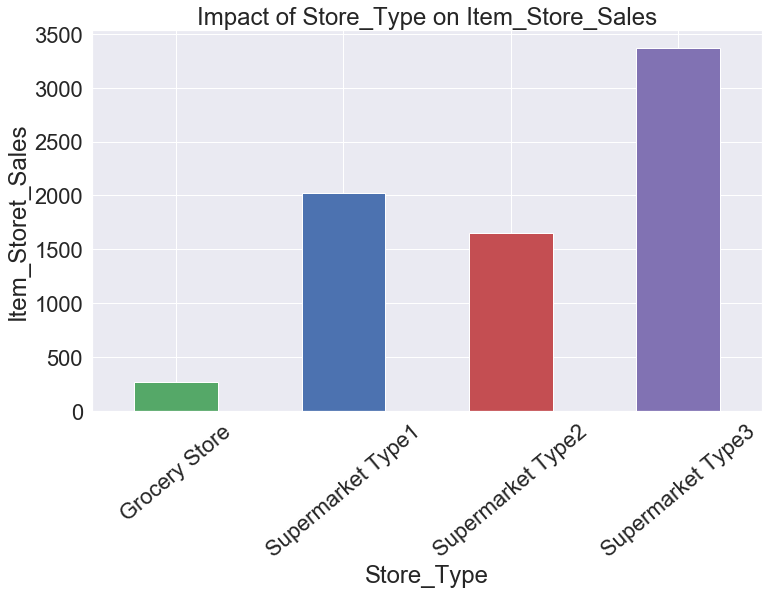

In [46]:
Store_Type_pivot = data.pivot_table(index='Store_Type', values="Item_Store_Sales", aggfunc=np.median)

Store_Type_pivot.plot(kind='bar', color=('g','b','r','m'),figsize=(12,7))
plt.xlabel("Store_Type")
plt.ylabel("Item_Storet_Sales")
plt.title("Impact of Store_Type on Item_Store_Sales")
plt.xticks(rotation=40)
plt.legend().set_visible(False)
plt.show()

# Supermarket Type 3 Store Type contributes most to sales

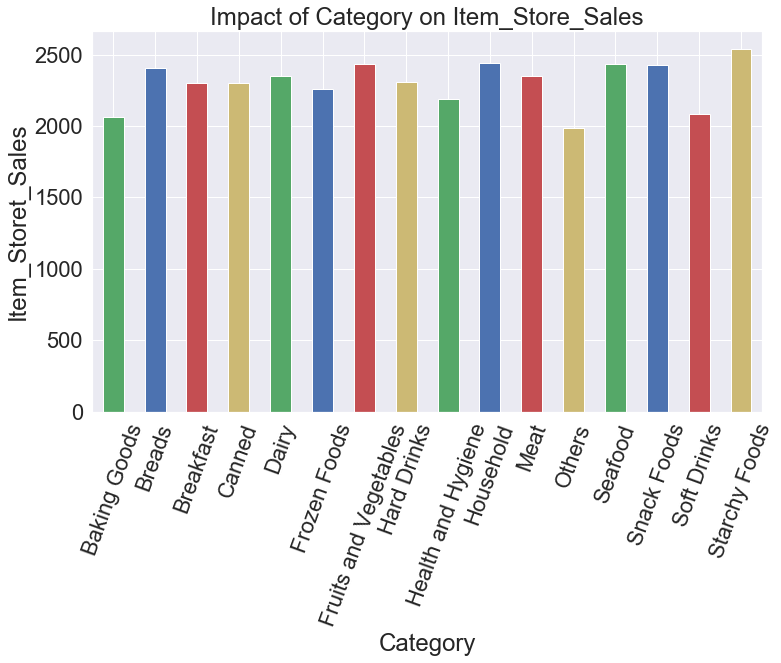

In [47]:
Category_pivot = data.pivot_table(index='Category', values="Item_Store_Sales", aggfunc=np.mean)
Category_pivot.plot(kind='bar', color=('g','b','r','y'),figsize=(12,7))
plt.xlabel("Category")
plt.ylabel("Item_Storet_Sales")
plt.title("Impact of Category on Item_Store_Sales")
plt.xticks(rotation=70)
plt.legend().set_visible(False)
plt.show()

# Products within the Starchy foods category contribute most to sales

# We OneHot Encode the categorical data so that it is able to be processed by the model. This technique is used to quantify categorical data where it compares each level of the categorical variable to a fixed reference level. It converts a single variable with n observations and x distinct values, to x binary variables with n observations where each observation denotes 1 as present and 0 as absent of the dichotomous binary variable.

# It was chosen over LabelEncoding, since there are different numbers in the same column, the model will misunderstand the data to be in some kind of order, 0 < 1 < 2. But this isn’t the case at all. To overcome this problem, we use One Hot Encoder. 

In [48]:
#make a column for each categorical data
# Select the categorical columns
categorical_subset = data[['Store_Size', 'Store_Location_Type','Store_Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

data.drop(labels=['Store_Size', 'Store_Location_Type','Store_Type'], axis=1, inplace=True)
data = pd.concat([data, categorical_subset], axis = 1)

In [49]:
data

,Weight,FatContent,Visibility,Category,Max_Price,Store_Establishment_Year,Item_Store_Sales,Store_Size_High,Store_Size_Medium,Store_Size_Small,Store_Location_Type_Tier 1,Store_Location_Type_Tier 2,Store_Location_Type_Tier 3,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3
0,9.300,Low_Fat,0.016047,Dairy,249.8092,1999,3735.1380,0,1,0,1,0,0,0,1,0,0
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,443.4228,0,1,0,0,0,1,0,0,1,0
2,17.500,Low_Fat,0.016760,Meat,141.6180,1999,2097.2700,0,1,0,1,0,0,0,1,0,0
4,8.930,Low_Fat,0.000000,Household,53.8614,1987,994.7052,1,0,0,0,0,1,0,1,0,0
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,556.6088,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,20.750,Regular,0.083607,Frozen Foods,178.8318,1997,3608.6360,0,0,1,1,0,0,0,1,0,0
8518,6.865,Low_Fat,0.056783,Snack Foods,214.5218,1987,2778.3834,1,0,0,0,0,1,0,1,0,0
8520,10.600,Low_Fat,0.035186,Health and Hygiene,85.1224,2004,1193.1136,0,0,1,0,1,0,0,1,0,0
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,1845.5976,0,1,0,0,0,1,0,0,1,0


In [50]:
# We OneHot Encode the new binned columns as once the values are binned, the bins are treated as categories

In [51]:
# #make a column for each categorical data
# # Select the categorical columns
# categorical_subset = data[['binned_weight', 'binned_visibility','binned_max_price']]

# # One hot encode
# categorical_subset = pd.get_dummies(categorical_subset)

# data.drop(labels=['binned_weight', 'binned_visibility','binned_max_price'], axis=1, inplace=True)
# data = pd.concat([data, categorical_subset], axis = 1)

In [52]:
data

,Weight,FatContent,Visibility,Category,Max_Price,Store_Establishment_Year,Item_Store_Sales,Store_Size_High,Store_Size_Medium,Store_Size_Small,Store_Location_Type_Tier 1,Store_Location_Type_Tier 2,Store_Location_Type_Tier 3,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3
0,9.300,Low_Fat,0.016047,Dairy,249.8092,1999,3735.1380,0,1,0,1,0,0,0,1,0,0
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,443.4228,0,1,0,0,0,1,0,0,1,0
2,17.500,Low_Fat,0.016760,Meat,141.6180,1999,2097.2700,0,1,0,1,0,0,0,1,0,0
4,8.930,Low_Fat,0.000000,Household,53.8614,1987,994.7052,1,0,0,0,0,1,0,1,0,0
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,556.6088,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,20.750,Regular,0.083607,Frozen Foods,178.8318,1997,3608.6360,0,0,1,1,0,0,0,1,0,0
8518,6.865,Low_Fat,0.056783,Snack Foods,214.5218,1987,2778.3834,1,0,0,0,0,1,0,1,0,0
8520,10.600,Low_Fat,0.035186,Health and Hygiene,85.1224,2004,1193.1136,0,0,1,0,1,0,0,1,0,0
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,1845.5976,0,1,0,0,0,1,0,0,1,0


In [53]:
#make a column for each categorical data
# Select the categorical columns
categorical_subset = data[['FatContent', 'Category']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

data.drop(labels=['FatContent', 'Category'], axis=1, inplace=True)
data = pd.concat([data, categorical_subset], axis = 1)


In [54]:
data.columns 
    

Index(['Weight', 'Visibility', 'Max_Price', 'Store_Establishment_Year',
       'Item_Store_Sales', 'Store_Size_High', 'Store_Size_Medium',
       'Store_Size_Small', 'Store_Location_Type_Tier 1',
       'Store_Location_Type_Tier 2', 'Store_Location_Type_Tier 3',
       'Store_Type_Grocery Store', 'Store_Type_Supermarket Type1',
       'Store_Type_Supermarket Type2', 'Store_Type_Supermarket Type3',
       'FatContent_Low_Fat', 'FatContent_Regular', 'Category_Baking Goods',
       'Category_Breads', 'Category_Breakfast', 'Category_Canned',
       'Category_Dairy', 'Category_Frozen Foods',
       'Category_Fruits and Vegetables', 'Category_Hard Drinks',
       'Category_Health and Hygiene', 'Category_Household', 'Category_Meat',
       'Category_Others', 'Category_Seafood', 'Category_Snack Foods',
       'Category_Soft Drinks', 'Category_Starchy Foods'],
      dtype='object')

# Now we build the model. MultiLinearRegression() was applied as we are dealing with prediction of continuous values with more than one independent variables.

In [55]:
y = data['Item_Store_Sales']
X = data[['Weight', 'Visibility', 'Max_Price', 'Store_Establishment_Year', 'Store_Size_High', 'Store_Size_Medium',
       'Store_Size_Small', 'Store_Location_Type_Tier 1',
       'Store_Location_Type_Tier 2', 'Store_Location_Type_Tier 3',
       'Store_Type_Grocery Store', 'Store_Type_Supermarket Type1',
       'Store_Type_Supermarket Type2', 'Store_Type_Supermarket Type3',
       'FatContent_Low_Fat', 'FatContent_Regular', 'Category_Baking Goods',
       'Category_Breads', 'Category_Breakfast', 'Category_Canned',
       'Category_Dairy', 'Category_Frozen Foods',
       'Category_Fruits and Vegetables', 'Category_Hard Drinks',
       'Category_Health and Hygiene', 'Category_Household', 'Category_Meat',
       'Category_Others', 'Category_Seafood', 'Category_Snack Foods',
       'Category_Soft Drinks', 'Category_Starchy Foods']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
y_pred =lm.fit(X_train, y_train)
print('Coefficients: \n', lm.coef_)
predictions = lm.predict(X_test)

Coefficients: 
 [   -6.17566679  -386.99434661    16.12272005    -4.60202151
  -467.71862237   293.6153574    174.10326497  -248.67737842
  -113.2164957    361.89387412 -1388.79019933   559.17770284
  -396.97545547  1226.58795196    -2.76931932     2.76931932
    -2.37327402     8.57425049   150.87945389    19.59150357
   -84.05300309   -22.88365876    49.7872842    -58.72157577
    24.68441864   -50.02422681    31.12819016   -60.83068602
   110.82667241    -7.01191979   -54.17707451   -55.39635457]


In [56]:
# from sklearn.linear_model import LinearRegression
# train_copy = data[['Store_Establishment_Year', 'Store_Size_High', 'Store_Size_Medium',
#        'Store_Size_Small', 'Store_Location_Type_Tier 1',
#        'Store_Location_Type_Tier 2', 'Store_Location_Type_Tier 3',
#        'Store_Type_Grocery Store', 'Store_Type_Supermarket Type1',
#        'Store_Type_Supermarket Type2', 'Store_Type_Supermarket Type3',
#        'FatContent_Low_Fat', 'FatContent_Regular', 'Category_Baking Goods',
#        'Category_Breads', 'Category_Breakfast', 'Category_Canned',
#        'Category_Dairy', 'Category_Frozen Foods',
#        'Category_Fruits and Vegetables', 'Category_Hard Drinks',
#        'Category_Health and Hygiene', 'Category_Household', 'Category_Meat',
#        'Category_Others', 'Category_Seafood', 'Category_Snack Foods',
#        'Category_Soft Drinks', 'Category_Starchy Foods', 'binned_weight_lower',
#        'binned_weight_low', 'binned_weight_middle', 'binned_weight_high',
#        'binned_weight_higher', 'binned_visibility_not_all',
#        'binned_visibility_not_visible', 'binned_visibility_visible',
#        'binned_visibility_very_visible', 'binned_max_price_ext_low_price',
#        'binned_max_price_lowest_price', 'binned_max_price_lower_price',
#        'binned_max_price_low_price', 'binned_max_price_middle_price',
#        'binned_max_price_high_price', 'binned_max_price_higher_price',
#        'binned_max_price_highest_price', 'binned_max_price_ext_high_price']]
# train_copy =pd.get_dummies(train_copy)
# train_copy=train_copy.fillna(0)
# linear_regr_test = LinearRegression()

# fig, axes = plt.subplots(1,len(train_copy.columns.values),sharey=True,constrained_layout=True,figsize=(30,15))

# for i,e in enumerate(train_copy.columns):
#   linear_regr_test.fit(train_copy[e].values[:,np.newaxis], y.values)
#   axes[i].set_title("Best fit line")
#   axes[i].set_xlabel(str(e))
#   axes[i].set_ylabel('SalePrice')
#   axes[i].scatter(train_copy[e].values[:,np.newaxis], y,color='g')
#   axes[i].plot(train_copy[e].values[:,np.newaxis], 
#   linear_regr_test.predict(train_copy[e].values[:,np.newaxis]),color='k')

In [57]:
from sklearn import metrics

In [58]:
print('R2 score:', metrics.r2_score(y_test, predictions))


R2 score: 0.5764803534610115


In [59]:
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

846.84179144102
1341651.4996193743
1158.2968098114466


In [60]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


# labelencoder_y_train = LabelEncoder()
# y_train = labelencoder_y_train.fit_transform(y_train)
# labelencoder_y_test = LabelEncoder()
# y_test = labelencoder_y_test.fit_transform(y_test)

In [61]:
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

# y_pred=clf.predict(X_test)
# # from sklearn.linear_model import LinearRegression
# # lm = LinearRegression()
# # y_pred =lm.fit(X_train, y_train)
# # print('Coefficients: \n', lm.coef_)
# # predictions = lm.predict(X_test)

# Now we deal with prediciting the test dataset

In [62]:
datas = pd.read_csv("bundas_test.csv")
datas.head()

,Item_ID,Weight,FatContent,Visibility,Category,Max_Price,Store_ID,Store_Establishment_Year,Store_Size,Store_Location_Type,Store_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [63]:
datas = datas.drop(['Store_ID' , 'Item_ID'] ,axis =1)

In [64]:
def missing_values_table(datas):
        # Total missing values
        mis_val = datas.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * datas.isnull().sum() / len(datas)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(datas.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(datas)

Your selected dataframe has 9 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Store_Size,1606,28.3
Weight,976,17.2


In [65]:
datas = datas.dropna(subset=['Store_Size'])

In [66]:
#imputing missing values with median
Weight = datas['Weight']
median = Weight.median()
print(median)
Weight.fillna(median,inplace = True)

12.35


In [67]:
 datas['FatContent'] = datas['FatContent'].replace({'Low Fat': 'Low_Fat', 'Regular': 'Regular', 'low fat': 'Low_Fat', 'LF': 'Low_Fat', 'reg':'Regular'})

In [68]:
datas

,Weight,FatContent,Visibility,Category,Max_Price,Store_Establishment_Year,Store_Size,Store_Location_Type,Store_Type
0,20.75,Low_Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
4,12.35,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
5,9.80,Regular,0.063817,Fruits and Vegetables,117.1492,1997,Small,Tier 1,Supermarket Type1
6,19.35,Regular,0.082602,Baking Goods,50.1034,2009,Medium,Tier 3,Supermarket Type2
7,12.35,Low_Fat,0.015782,Baking Goods,81.0592,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5673,7.07,Low_Fat,0.094053,Snack Foods,116.0834,2009,Medium,Tier 3,Supermarket Type2
5674,15.70,Low_Fat,0.030704,Hard Drinks,43.2770,1997,Small,Tier 1,Supermarket Type1
5675,13.00,Regular,0.070411,Snack Foods,63.4484,1999,Medium,Tier 1,Supermarket Type1
5676,10.50,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1


In [69]:
# #weight
# datas['binned_weight']= pd.cut(datas['Weight'], bins = [0,5,10,15,20,25],labels= ['lower', 'low','middle', 'high','higher'])


In [70]:
# datas['binned_max_price']= pd.cut(datas['Max_Price'], bins = [0,30,60,90,120,150,180,210,240,270],labels= ['ext_low_price','lowest_price','lower_price', 'low_price','middle_price', 'high_price','higher_price','highest_price','ext_high_price'])

In [71]:
# datas['binned_visibility']= pd.cut(datas['Visibility'], bins = [-0.1,0.0,0.10,0.20,0.33],labels= ['not_all','not_visible','visible','very_visible'])


In [72]:
#make a column for each categorical data
# Select the categorical columns
categorical_subset = datas[['Store_Size', 'Store_Location_Type','Store_Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

datas.drop(labels=['Store_Size', 'Store_Location_Type','Store_Type'], axis=1, inplace=True)
datas = pd.concat([datas, categorical_subset], axis = 1)

In [73]:
# #make a column for each categorical data
# # Select the categorical columns
# categorical_subset = datas[['binned_weight', 'binned_visibility','binned_max_price']]

# # One hot encode
# categorical_subset = pd.get_dummies(categorical_subset)

# datas.drop(labels=['binned_weight', 'binned_visibility','binned_max_price'], axis=1, inplace=True)
# datas = pd.concat([datas, categorical_subset], axis = 1)

In [74]:
#make a column for each categorical data
# Select the categorical columns
categorical_subset = datas[['FatContent', 'Category']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

datas.drop(labels=['FatContent', 'Category'], axis=1, inplace=True)
datas = pd.concat([datas, categorical_subset], axis = 1)


In [75]:
datas

,Weight,Visibility,Max_Price,Store_Establishment_Year,Store_Size_High,Store_Size_Medium,Store_Size_Small,Store_Location_Type_Tier 1,Store_Location_Type_Tier 2,Store_Location_Type_Tier 3,...,Category_Fruits and Vegetables,Category_Hard Drinks,Category_Health and Hygiene,Category_Household,Category_Meat,Category_Others,Category_Seafood,Category_Snack Foods,Category_Soft Drinks,Category_Starchy Foods
0,20.75,0.007565,107.8622,1999,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,12.35,0.118599,234.2300,1985,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,9.80,0.063817,117.1492,1997,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,19.35,0.082602,50.1034,2009,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,12.35,0.015782,81.0592,1985,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5673,7.07,0.094053,116.0834,2009,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5674,15.70,0.030704,43.2770,1997,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
5675,13.00,0.070411,63.4484,1999,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5676,10.50,0.013496,141.3154,1997,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [76]:
data.columns

Index(['Weight', 'Visibility', 'Max_Price', 'Store_Establishment_Year',
       'Item_Store_Sales', 'Store_Size_High', 'Store_Size_Medium',
       'Store_Size_Small', 'Store_Location_Type_Tier 1',
       'Store_Location_Type_Tier 2', 'Store_Location_Type_Tier 3',
       'Store_Type_Grocery Store', 'Store_Type_Supermarket Type1',
       'Store_Type_Supermarket Type2', 'Store_Type_Supermarket Type3',
       'FatContent_Low_Fat', 'FatContent_Regular', 'Category_Baking Goods',
       'Category_Breads', 'Category_Breakfast', 'Category_Canned',
       'Category_Dairy', 'Category_Frozen Foods',
       'Category_Fruits and Vegetables', 'Category_Hard Drinks',
       'Category_Health and Hygiene', 'Category_Household', 'Category_Meat',
       'Category_Others', 'Category_Seafood', 'Category_Snack Foods',
       'Category_Soft Drinks', 'Category_Starchy Foods'],
      dtype='object')

In [77]:
X_test = datas[['Weight', 'Visibility', 'Max_Price', 'Store_Establishment_Year',
        'Store_Size_High', 'Store_Size_Medium',
       'Store_Size_Small', 'Store_Location_Type_Tier 1',
       'Store_Location_Type_Tier 2', 'Store_Location_Type_Tier 3',
       'Store_Type_Grocery Store', 'Store_Type_Supermarket Type1',
       'Store_Type_Supermarket Type2', 'Store_Type_Supermarket Type3',
       'FatContent_Low_Fat', 'FatContent_Regular', 'Category_Baking Goods',
       'Category_Breads', 'Category_Breakfast', 'Category_Canned',
       'Category_Dairy', 'Category_Frozen Foods',
       'Category_Fruits and Vegetables', 'Category_Hard Drinks',
       'Category_Health and Hygiene', 'Category_Household', 'Category_Meat',
       'Category_Others', 'Category_Seafood', 'Category_Snack Foods',
       'Category_Soft Drinks', 'Category_Starchy Foods']]


In [78]:
output = lm.predict(X_test)
output

array([1792.53953227, 5109.74543901, 1940.1552288 , ..., 1105.54723045,
       2288.13177725, 2374.93471783])

In [79]:
datas['Predicted_Sales'] = output
datas.columns

Index(['Weight', 'Visibility', 'Max_Price', 'Store_Establishment_Year',
       'Store_Size_High', 'Store_Size_Medium', 'Store_Size_Small',
       'Store_Location_Type_Tier 1', 'Store_Location_Type_Tier 2',
       'Store_Location_Type_Tier 3', 'Store_Type_Grocery Store',
       'Store_Type_Supermarket Type1', 'Store_Type_Supermarket Type2',
       'Store_Type_Supermarket Type3', 'FatContent_Low_Fat',
       'FatContent_Regular', 'Category_Baking Goods', 'Category_Breads',
       'Category_Breakfast', 'Category_Canned', 'Category_Dairy',
       'Category_Frozen Foods', 'Category_Fruits and Vegetables',
       'Category_Hard Drinks', 'Category_Health and Hygiene',
       'Category_Household', 'Category_Meat', 'Category_Others',
       'Category_Seafood', 'Category_Snack Foods', 'Category_Soft Drinks',
       'Category_Starchy Foods', 'Predicted_Sales'],
      dtype='object')

In [80]:
datas['Predicted_Sales']

0       1792.539532
4       5109.745439
5       1940.155229
6        459.492887
7       2756.146129
           ...     
5673    1584.498304
5674     611.465263
5675    1105.547230
5676    2288.131777
5677    2374.934718
Name: Predicted_Sales, Length: 4075, dtype: float64

In [81]:
final = datas[['Weight', 'Visibility', 'Max_Price', 'Store_Establishment_Year', 'Predicted_Sales']]
final.head()

,Weight,Visibility,Max_Price,Store_Establishment_Year,Predicted_Sales
0,20.75,0.007565,107.8622,1999,1792.539532
4,12.35,0.118599,234.2300,1985,5109.745439
5,9.80,0.063817,117.1492,1997,1940.155229
6,19.35,0.082602,50.1034,2009,459.492887
7,12.35,0.015782,81.0592,1985,2756.146129


In [82]:
final_data = pd.read_csv("bundas_test.csv")
final_data.head()

,Item_ID,Weight,FatContent,Visibility,Category,Max_Price,Store_ID,Store_Establishment_Year,Store_Size,Store_Location_Type,Store_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [83]:
final_data = final_data.dropna(subset=['Store_Size'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4075 entries, 0 to 5677
Data columns (total 11 columns):
Item_ID                     4075 non-null object
Weight                      3099 non-null float64
FatContent                  4075 non-null object
Visibility                  4075 non-null float64
Category                    4075 non-null object
Max_Price                   4075 non-null float64
Store_ID                    4075 non-null object
Store_Establishment_Year    4075 non-null int64
Store_Size                  4075 non-null object
Store_Location_Type         4075 non-null object
Store_Type                  4075 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 382.0+ KB


In [84]:
final_data['Predicted_Sales'] = output
final_data.columns


Index(['Item_ID', 'Weight', 'FatContent', 'Visibility', 'Category',
       'Max_Price', 'Store_ID', 'Store_Establishment_Year', 'Store_Size',
       'Store_Location_Type', 'Store_Type', 'Predicted_Sales'],
      dtype='object')

In [85]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4075 entries, 0 to 5677
Data columns (total 12 columns):
Item_ID                     4075 non-null object
Weight                      3099 non-null float64
FatContent                  4075 non-null object
Visibility                  4075 non-null float64
Category                    4075 non-null object
Max_Price                   4075 non-null float64
Store_ID                    4075 non-null object
Store_Establishment_Year    4075 non-null int64
Store_Size                  4075 non-null object
Store_Location_Type         4075 non-null object
Store_Type                  4075 non-null object
Predicted_Sales             4075 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 413.9+ KB


In [86]:
#imputing missing values with median
Weight = final_data['Weight']
median = Weight.median()
print(median)
Weight.fillna(median,inplace = True)

12.35


In [87]:
 final_data['FatContent'] = final_data['FatContent'].replace({'Low Fat': 'Low_Fat', 'Regular': 'Regular', 'low fat': 'Low_Fat', 'LF': 'Low_Fat', 'reg':'Regular'})

In [88]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4075 entries, 0 to 5677
Data columns (total 12 columns):
Item_ID                     4075 non-null object
Weight                      4075 non-null float64
FatContent                  4075 non-null object
Visibility                  4075 non-null float64
Category                    4075 non-null object
Max_Price                   4075 non-null float64
Store_ID                    4075 non-null object
Store_Establishment_Year    4075 non-null int64
Store_Size                  4075 non-null object
Store_Location_Type         4075 non-null object
Store_Type                  4075 non-null object
Predicted_Sales             4075 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 413.9+ KB


In [89]:
final_data.to_csv('DataThon-Bundas_Solution_Updated.csv')

In [90]:
final_data

,Item_ID,Weight,FatContent,Visibility,Category,Max_Price,Store_ID,Store_Establishment_Year,Store_Size,Store_Location_Type,Store_Type,Predicted_Sales
0,FDW58,20.75,Low_Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1792.539532
4,FDY38,12.35,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5109.745439
5,FDH56,9.80,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,1940.155229
6,FDL48,19.35,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,459.492887
7,FDC48,12.35,Low_Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.146129
...,...,...,...,...,...,...,...,...,...,...,...,...
5673,FDF46,7.07,Low_Fat,0.094053,Snack Foods,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1584.498304
5674,DRL35,15.70,Low_Fat,0.030704,Hard Drinks,43.2770,OUT046,1997,Small,Tier 1,Supermarket Type1,611.465263
5675,FDW46,13.00,Regular,0.070411,Snack Foods,63.4484,OUT049,1999,Medium,Tier 1,Supermarket Type1,1105.547230
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2288.131777


In [91]:
# clf_rf = RandomForestClassifier(n_estimators=40, random_state=21)
# clf_rf.fit(X_train, y_train)
# clf_rf_pred= clf_rf.predict(X_test)
# print("Accuracy score : ",accuracy_score(y_test, clf_rf_pred))
# print ("Recall score   : ", recall_score(clf_rf_pred,y_test))
# confusion_matrix(y_test, clf_rf_pred)
# print ("classification report :\n",classification_report(clf_rf_pred,y_test))